In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
D = pd.read_hdf('//FS2.smpp.local\RTO\CIS-PD MUSC\decoded_forms\\form509.h5')

In [5]:
D[D.SubjectCode==1003.0].Q03

0    Left
1    Left
2    Left
3    Left
4    Left
5    Left
6    Left
Name: Q03, dtype: object

In [32]:
taskList = np.array(['Standing', 'Walking', 'Walking while counting', 'Finger to nose--right hand', 
                     'Finger to nose--left hand', 'Alternating right hand movements', 
                     'Alternating left hand movements', 'Sit to stand', 'Drawing on a paper', 
                     'Typing on a computer keyboard', 'Assembling nuts and bolts', 
                     'Taking a glass of water and drinking', 'Organizing sheets in a folder', 'Folding towels', 
                     'Sitting'])
taskList_Abb = np.array(['Stndg', 'Wlkg', 'WlkgCnt', 'FtnR', 'FtnL', 'RamR', 'RamL', 'SitStand', 
                         'Drwg', 'Typg', 'NtsBts', 'Drnkg', 'Sheets', 'Fldg', 'Sitng'])

In [60]:
Questions = pd.read_sas('//FS2.smpp.local\RTO\CIS-PD MUSC\datadictionary.sas7bdat')
Questions = Questions[Questions.zFormID == 509.0]
Questions = Questions.drop(columns = list(set(Questions.columns)-set(['zFieldNm','zFieldNb'])))
Questions.zFieldNm = Questions.zFieldNm.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)
Questions.zFieldNb = Questions.zFieldNb.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)
## Correct Typos
Questions.loc[Questions.zFieldNm=='Walking  tremor left upper limb rating','zFieldNm'] = 'Walking tremor left upper limb rating'
Questions.loc[Questions.zFieldNb=='Q70','zFieldNm'] = 'Alternating left hand movements tremor right upper limb rating'
Questions.loc[Questions.zFieldNb=='Q145','zFieldNm'] = 'Sitting tremor right upper limb rating'

In [66]:
AllScores = pd.DataFrame()
for ind in D.index:
    row = D.loc[ind,:]
    side = row.Q03
    try:
        side = side.lower()
    except(AttributeError):
        print(row.SubjectCode, row.VisitNm, row.Q03)
        continue
    RowScores = pd.DataFrame(columns=taskList_Abb, index=[ind])
    for task, task_abr in zip(taskList,taskList_Abb):
        QInd = Questions.zFieldNm==task+' tremor '+side+' upper limb rating'
        QNum = Questions[QInd].zFieldNb
#         print(task+' tremor '+side+' upper limb rating',row[QNum].values)
        RowScores[task_abr] = row[QNum].values[0]
    AllScores = pd.concat((AllScores,RowScores))
    

1005.0 2 Weeks: Time 120 nan
1005.0 1 Month nan
1020.0 2 Weeks: Time 0 nan
1020.0 2 Weeks: Time 30 nan
1020.0 2 Weeks: Time 60 nan
1020.0 2 Weeks: Time 90 nan
1020.0 2 Weeks: Time 120 nan
1020.0 2 Weeks: Time 150 nan
1047.0 1 Month nan
1048.0 2 Weeks: Time 150 nan


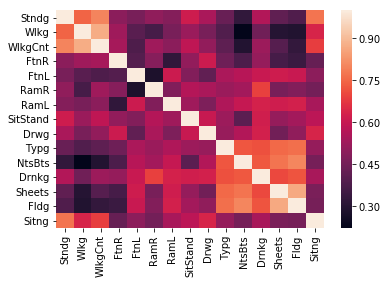

In [71]:
sns.heatmap(AllScores.corr())

In [30]:
D.shape

(197, 151)